## Phase 4 (Modeling): Gradient Boosting & Halving Grid Search

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 19](https://data-science.training/kapitel-19/)
* Datum: 23.03.2023

Datenversion: 9

Methode: Gradient Boosting (GB)

Optimierung: Halving Grid Search (HGS)

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedKFold, HalvingGridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Datenversion festlegen: 9
version  = 9
# Modell-Abkürzung festlegen: gb = Gradient Boosting
shortcut = 'gb'
# Optimierungsart festlegen: hgs = Halving Grid Search
opt      = 'hgs'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Gradient Boosting Methode auswählen
#  (KNIME: "XYZ Learner")
model = GradientBoostingClassifier(random_state=0)
print(model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [10]:
# Parameter
parameters = {
                'max_depth': range(1, 4),
                'min_samples_leaf': range(10, 110, 10)
             }

In [11]:
# Halving Grid Search
hgs = HalvingGridSearchCV(model, parameters, scoring='accuracy', resource='n_estimators', max_resources=100, cv=skf, \
                          factor=2, verbose=2, refit=False, random_state=0)
hgs.fit(X, y)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 6
max_resources_: 100
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 30
n_resources: 6
Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=10, n_estimators=6; total time=   0.0s
[CV] END ...m

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                    estimator=GradientBoostingClassifier(random_state=0),
                    factor=2, max_resources=100,
                    param_grid={'max_depth': range(1, 4),
                                'min_samples_leaf': range(10, 110, 10)},
                    random_state=0, refit=False, resource='n_estimators',
                    scoring='accuracy', verbose=2)

[CV] END ..max_depth=2, min_samples_leaf=60, n_estimators=12; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=60, n_estimators=12; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=60, n_estimators=12; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=60, n_estimators=12; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=60, n_estimators=12; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=60, n_estimators=12; total time=   0.0s
[CV] END .max_depth=3, min_samples_leaf=100, n_estimators=12; total time=   0.0s
[CV] END .max_depth=3, min_samples_leaf=100, n_estimators=12; total time=   0.0s
[CV] END .max_depth=3, min_samples_leaf=100, n_estimators=12; total time=   0.0s
[CV] END .max_depth=3, min_samples_leaf=100, n_estimators=12; total time=   0.0s
[CV] END .max_depth=3, min_samples_leaf=100, n_estimators=12; total time=   0.0s
[CV] END .max_depth=3, min_samples_leaf=100, n_estimators=12; total time=   0.0s
[CV] END .max_depth=3, min_s

[CV] END ..max_depth=2, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=2, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_samples_leaf=80, n_estimators=48; total time=   0.0s
[CV] END ..max_depth=3, min_

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                    estimator=GradientBoostingClassifier(random_state=0),
                    factor=2, max_resources=100,
                    param_grid={'max_depth': range(1, 4),
                                'min_samples_leaf': range(10, 110, 10)},
                    random_state=0, refit=False, resource='n_estimators',
                    scoring='accuracy', verbose=2)

In [12]:
# Beste Parameter
best_parameters = hgs.best_params_
print(best_parameters)

{'max_depth': 2, 'min_samples_leaf': 60, 'n_estimators': 96}


In [13]:
# Modell mit den besten Parametern initialisieren
#  (KNIME: "XYZ Learner")
model = GradientBoostingClassifier(random_state=0)
model.set_params(**best_parameters)
print(model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 60, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 96, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [14]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 468
* TP (True  Positives) : 268
* FN (False Negatives) : 74
* FP (False Positives) : 81

Gütemaße

* Genauigkeit  (Accuracy)    :   82,60 %
* Spezifität   (Specificity) :   85,25 %
* Sensitivität (Sensitivity) :   78,34 %
* Präzision    (Precision)   :   76,93 %
* Recall       (Recall)      :   78,34 %
* F-Maß        (F Score)     :   77,49 %
* AURC         (AURC)        :   85,89 %
* LogLoss      (LogLoss)     :    0,426

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,73 %


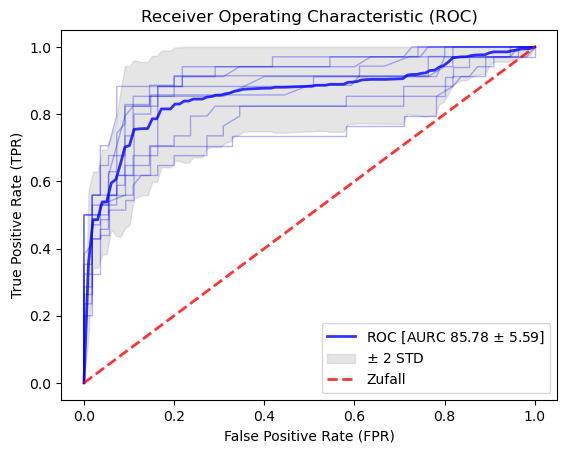

In [15]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [16]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

GradientBoostingClassifier(max_depth=2, min_samples_leaf=60, n_estimators=96,
                           random_state=0)

In [17]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version) + '_' + opt
pk.dump(model, open(filename, 'wb'))

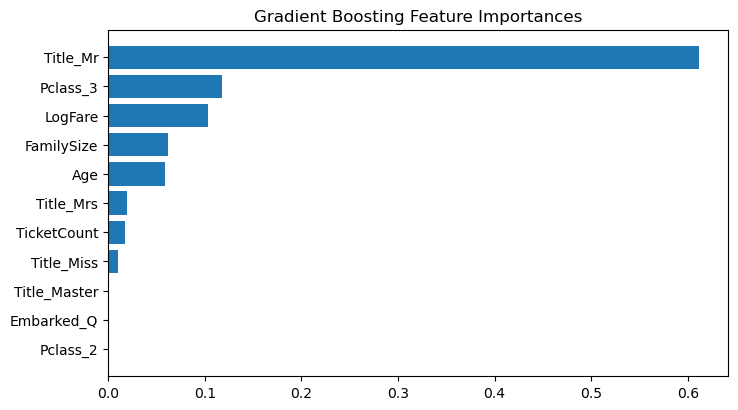

In [18]:
# Horizontales Balkendiagramm mit der "Feature Importance (fi)"
#  (KNIME: "Gradient Boosted Trees Learner")
#
# Extraktion der Feature-Namen und -Werte
names  = df_train.columns.values
names  = np.delete(names, 0) # Ersten Spaltennamen (= Survived) entfernen
values = model.feature_importances_
#
# Data Frame aus dem Dictionary der Namen und Werte erstellen und aufsteigend sortieren
df_fi = pd.DataFrame({'names': names, 'values': values})
df_fi = df_fi.sort_values('values')
#
# Horizontales Balkendiagramm erstellen
plt.figure(figsize=(8, 4.5))
plt.barh('names', 'values', data=df_fi)
plt.title('Gradient Boosting Feature Importances')
plt.show()

In [19]:
display(df_fi)

,names,values
4,Pclass_2,0.000000
6,Embarked_Q,0.000000
7,Title_Master,0.000000
8,Title_Miss,0.009762
2,TicketCount,0.017955
10,Title_Mrs,0.019354
0,Age,0.059144
1,FamilySize,0.061766
3,LogFare,0.103143
5,Pclass_3,0.117670


## Ergebnisse

#### V9, GB, HGS

Parameter

{'max_depth': 2, 'min_samples_leaf': 60, 'n_estimators': 96}

GradientBoostingClassifier(max_depth=2, min_samples_leaf=60, n_estimators=96, random_state=0)

Confusion Matrix

* TN (True  Negatives) : 468
* TP (True  Positives) : 268
* FN (False Negatives) : 74
* FP (False Positives) : 81

Gütemaße

* Genauigkeit  (Accuracy)    :   82,60 %
* Spezifität   (Specificity) :   85,25 %
* Sensitivität (Sensitivity) :   78,34 %
* Präzision    (Precision)   :   76,93 %
* Recall       (Recall)      :   78,34 %
* F-Maß        (F Score)     :   77,49 %
* AURC         (AURC)        :   85,89 %
* LogLoss      (LogLoss)     :    0,426

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,73 %
